## Image pre-processing for dogs and cats

Classifying images of dogs and cats

In [1]:
import os, shutil
# The path where the original directory is located
original_dataset_dir = 'C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\train\\'
# Catalogues after data set classification
base_dir = 'C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\train1'
os.mkdir(base_dir)
#Catalogue of training, validation and test datasets
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
# Cat training pictures in the catalogue
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# Dog training pictures in the catalogue
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
# Cat verification of the directory where the image is located
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# Directory where the dog validation dataset is located
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
# The directory where the cat test dataset is located
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
# Directory where the dog test dataset is located
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
# Copy the first 5000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy the next 2500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy the next 2500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
# Copy the first 5000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 
# Copy the next 2500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)    
# Copy the next 2500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

View the number of images in the corresponding catalogue after the category.

In [2]:
# Output the number of images in the corresponding catalogue of the dataset
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 5000
total training dog images: 5000
total validation cat images: 2500
total validation dog images: 2500
total test cat images: 2500
total test dog images: 2500


5000 images each of dog and cat training, 2500 images each of verification and 2500 images each of testing.

## Baseline model for cat and dog classification

Building a network model

In [3]:
# Network Model Construction
from keras import layers
from keras import models

# keras' sequential model
model = models.Sequential()
# Convolutional layer, convolutional kernel is 3*3, activation function relu
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional layer, convolutional kernel 2*2, activation function relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# # Convolutional layer, convolutional kernel is 3*3, activation function relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolution layer, convolution kernel is 3*3, activation function relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# flatten layer for one-dimensionalizing multidimensional inputs and for the transition between convolutional and fully connected layers
model.add(layers.Flatten())
# Fully connected, activation function relu
model.add(layers.Dense(512, activation='relu'))
# Fully connected, activation function sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


To view the status of the parameters in each layer of the model.

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

Configuration optimizer.

loss: calculates the loss, in this case the cross-entropy loss is used

metrics: list containing metrics to evaluate the performance of the model during training and testing

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Image format conversion

All images are resized to 150x150 and the ImageDataGenerator tool is used to convert the local image .jpg format to an RGB pixel grid and then to a floating point tensor for uploading to the web.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target catalogue
        train_dir,
        # All images will be adjusted to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Because we use binary cross-entropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
# View the results of the image pre-processing above
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
# Model training process
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
# May take a lot of time


Epoch 1/30
100/100 [==============================] - 34s 340ms/step - loss: 0.6900 - acc: 0.5560 - val_loss: 0.7117 - val_acc: 0.4930
Epoch 2/30
100/100 [==============================] - 33s 334ms/step - loss: 0.6701 - acc: 0.5855 - val_loss: 0.6598 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 34s 337ms/step - loss: 0.6413 - acc: 0.6390 - val_loss: 0.6032 - val_acc: 0.6840
Epoch 4/30
100/100 [==============================] - 33s 335ms/step - loss: 0.6044 - acc: 0.6725 - val_loss: 0.5843 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 33s 334ms/step - loss: 0.6034 - acc: 0.6690 - val_loss: 0.5631 - val_acc: 0.7130
Epoch 6/30
100/100 [==============================] - 31s 310ms/step - loss: 0.5755 - acc: 0.6865 - val_loss: 0.6113 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 31s 308ms/step - loss: 0.5600 - acc: 0.6955 - val_loss: 0.5494 - val_acc: 0.7300
Epoch 8/30
100/100 [==============================] - 

In [9]:
model.save('C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\cats_and_dogs_small_1.h5')

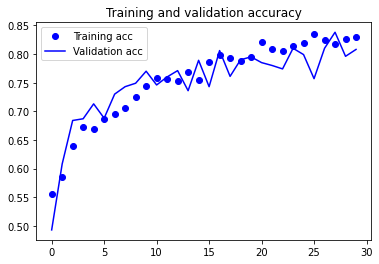

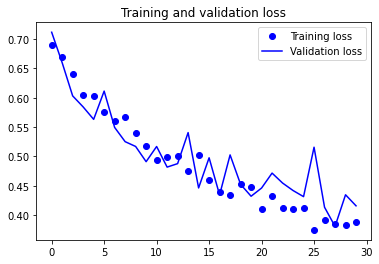

In [10]:
# Evaluate the model to see how accurate the predictions are
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Image augmentation

In [28]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

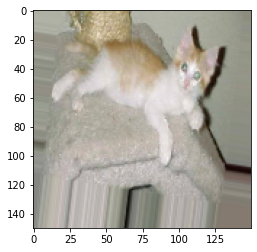

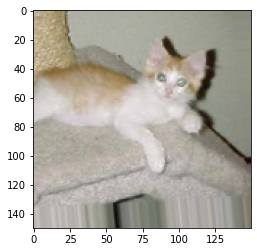

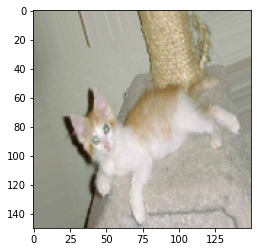

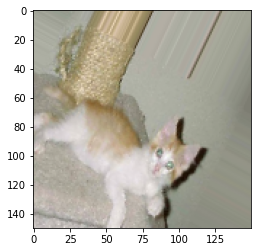

In [29]:
import matplotlib.pyplot as plt
# This is module with image preprocessing utilities
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[10]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
model.save('C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\cats_and_dogs_small_2.h5')
# May take a lot of time

Epoch 1/100
100/100 [==============================] - 46s 458ms/step - loss: 0.5617 - acc: 0.7106 - val_loss: 0.4577 - val_acc: 0.7856
Epoch 2/100
100/100 [==============================] - 46s 456ms/step - loss: 0.5298 - acc: 0.7262 - val_loss: 0.4080 - val_acc: 0.8125
Epoch 3/100
100/100 [==============================] - 45s 451ms/step - loss: 0.5418 - acc: 0.7187 - val_loss: 0.4200 - val_acc: 0.8031
Epoch 4/100
100/100 [==============================] - 45s 445ms/step - loss: 0.5398 - acc: 0.7313 - val_loss: 0.4479 - val_acc: 0.7868
Epoch 5/100
100/100 [==============================] - 45s 453ms/step - loss: 0.5228 - acc: 0.7450 - val_loss: 0.4227 - val_acc: 0.7925
Epoch 6/100
100/100 [==============================] - 45s 450ms/step - loss: 0.5043 - acc: 0.7556 - val_loss: 0.4535 - val_acc: 0.7850
Epoch 7/100
100/100 [==============================] - 45s 446ms/step - loss: 0.5213 - acc: 0.7456 - val_loss: 0.4079 - val_acc: 0.8230
Epoch 8/100
100/100 [===========================

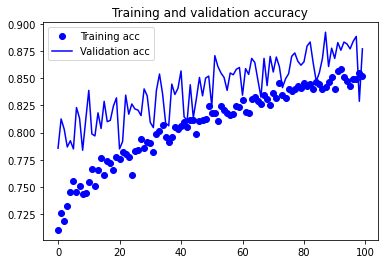

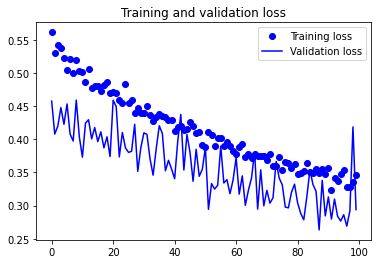

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Due to the increased amount of data, the training curve closely tracks the validation curve compared to the baseline model, which is the effect of the data enhancement, but it can still be found to be more volatile.

## Add dropout layer

In [16]:
# keras' sequential model
model = models.Sequential()
# Convolutional layer, convolutional kernel is 3*3, activation function relu
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional layer, convolutional kernel 2*2, activation function relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# # Convolutional layer, convolutional kernel is 3*3, activation function relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Convolution layer, convolution kernel is 3*3, activation function relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))
# flatten layer for one-dimensionalizing multidimensional inputs and for the transition between convolutional and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
# Fully connected, activation function relu
model.add(layers.Dense(512, activation='relu'))
# Fully connected, activation function sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_____

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
# May take a lot of time

Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 48s 479ms/step - loss: 0.6925 - acc: 0.5187 - val_loss: 0.6843 - val_acc: 0.5131
Epoch 2/100
100/100 [==============================] - 45s 453ms/step - loss: 0.6808 - acc: 0.5650 - val_loss: 0.6776 - val_acc: 0.5563
Epoch 3/100
100/100 [==============================] - 45s 453ms/step - loss: 0.6673 - acc: 0.5853 - val_loss: 0.6389 - val_acc: 0.6338
Epoch 4/100
100/100 [==============================] - 45s 448ms/step - loss: 0.6617 - acc: 0.6003 - val_loss: 0.6333 - val_acc: 0.6409
Epoch 5/100
100/100 [==============================] - 45s 453ms/step - loss: 0.6396 - acc: 0.6284 - val_loss: 0.5894 - val_acc: 0.6750
Epoch 6/100
100/100 [==============================] - 45s 455ms/step - loss: 0.6294 - acc: 0.6409 - val_loss: 0.5935 - val_acc: 0.6744
Epoch 7/100
100/100 [==============================] - 45s 448ms/step - loss: 0.6232 - acc: 0.6469 

In [18]:
model.save('C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\cats_and_dogs_small_3.h5')

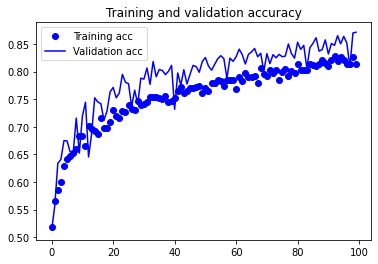

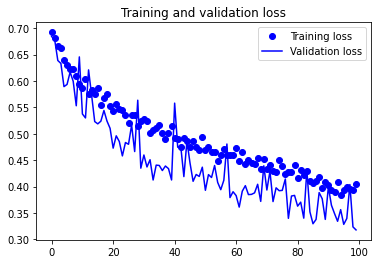

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

By adding an additional dropout layer, the training curve follows the validation curve more closely than if only data augmentation had been used, and the magnitude of fluctuations is reduced, making the training effect even better.

## VGG19

The VGG19 network we are borrowing now has a similar structure to the one above, except that it has far more Conv2D and MaxPooling layers than we have done above. When we borrow someone else's trained network, we often have to remove the network layers after Flatten(), because those network layers are related to the specific application scenario that someone else constructed the network for, and their application scenario is definitely different from ours.

The weight parameter tells the program to pass over the parameters corresponding to the convolutional and max pooling layers of the network and initialize them to the corresponding network layers
include_top tells the program whether to download the network layer after Flatten() as well. The layer corresponding to VGG19 is used to divide the images into 1000 different categories, and since we only use it to distinguish between dogs and cats, we remove it.
input_shape tells the network that the size of our input image is 150*150 pixels and that each pixel is represented by three values of [R, G, B]



In [1]:
from keras.applications import VGG19
conv_base = VGG19(weights = 'imagenet',include_top = False,input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### Passing the dog and cat dataset to the neural network

In [2]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\train1'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale = 1. / 255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory, target_size = (150, 150), 
                                            batch_size = batch_size,
                                            class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        # Input the image into the VGG19 convolutional layer and let it extract the information from the image
        features_batch = conv_base.predict(inputs_batch)
        # feature_batch is a 4*4*512 structure
        features[i * batch_size : (i + 1)*batch_size] = features_batch
        labels[i * batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count :
            # The loop for in on the generator is endless, so we must actively break
            break
        return features , labels
# extract_features returns data in the format (samples, 4, 4, 512)
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 10000 images belonging to 2 classes.
1/1 [==============================] - 1s 728ms/step
Found 5000 images belonging to 2 classes.
1/1 [==============================] - 1s 615ms/step
Found 5000 images belonging to 2 classes.
1/1 [==============================] - 1s 632ms/step


In [3]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4* 512))
from keras import models
from keras import layers
from keras import optimizers
# Constructing our own network layer to classify the output data
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(train_features, train_labels, epochs = 30, batch_size = 20, 
                    validation_data = (validation_features, validation_labels))

Epoch 1/30


C:\Users\xjk\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 19ms/step - loss: 0.6943 - acc: 0.9940 - val_loss: 0.6895 - val_acc: 0.9900
Epoch 2/30
100/100 [==============================] - 2s 18ms/step - loss: 0.6885 - acc: 0.9960 - val_loss: 0.6860 - val_acc: 0.9910
Epoch 3/30
100/100 [==============================] - 2s 19ms/step - loss: 0.6835 - acc: 0.9965 - val_loss: 0.6806 - val_acc: 0.9910
Epoch 4/30
100/100 [==============================] - 2s 19ms/step - loss: 0.6772 - acc: 0.9970 - val_loss: 0.6747 - val_acc: 0.9910
Epoch 5/30
100/100 [==============================] - 2s 21ms/step - loss: 0.6719 - acc: 0.9965 - val_loss: 0.6706 - val_acc: 0.9910
Epoch 6/30
100/100 [==============================] - 3s 27ms/step - loss: 0.6666 - acc: 0.9970 - val_loss: 0.6645 - val_acc: 0.9910
Epoch 7/30
100/100 [==============================] - 2s 23ms/step - loss: 0.6612 - acc: 0.9960 - val_loss: 0.6577 - val_acc: 0.9930
Epoch 8/30
100/100 [==============================] - 2s 20ms/step - loss: 0.654

Draw the training results and validation results

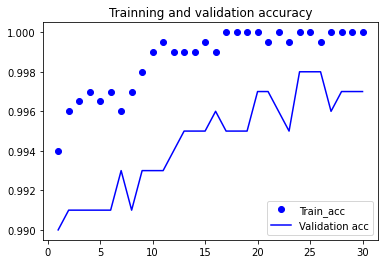

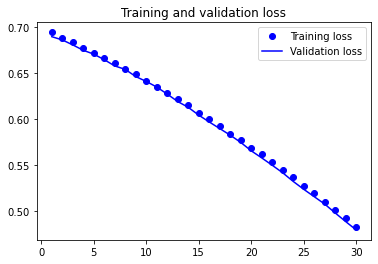

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Train_acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Trainning and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
max(model.history.history['val_acc'])

0.9980000257492065

We can see that the network achieves a correct calibration rate of over 99% for the images, while the loss estimates for the training data and the calibration data are exactly the same.

## Parameter tuning

1)Adding our own network layer on top of the convolutional layer of VGG19.

2)Fix the convolutional layer of VGG19 to remain unchanged.

3)Train our own added network layers with the data

4)Release the top two convolutional layers of VGG19

5)Train both the released layers and our own added layers with the data

In [6]:
model = models.Sequential()
# Add the convolutional layer of VGG19 directly to our network
model.add(conv_base)
# Adding our own network layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


Combine its top three layers with our own network layers for training, while freezing the bottom four layers

In [7]:
conv_base.trainable = True
set_trainable = False
# Once 'block5_conv1' is read, it means that the top three layers of the convolutional network are reached
# You can use conv_base.summary() to see the information of the convolutional layers
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        # When trainable == True it means that the network layer can be changed, otherwise the network layer will be frozen and cannot be modified
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
# Read in the image data
test_datagen = ImageDataGenerator(rescale = 1. / 255)
train_generator = test_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20,
                                                   class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(2e-5),
             metrics = ['acc'])

history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 10, 
                              validation_data = validation_generator,
                              validation_steps = 50)
# May take a lot of time

Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10


<ipython-input-11-dd0113428d9c>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 10,


100/100 [==============================] - 131s 1s/step - loss: 0.0182 - acc: 0.9940 - val_loss: 0.2112 - val_acc: 0.9490
Epoch 2/10
100/100 [==============================] - 131s 1s/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.4436 - val_acc: 0.9180
Epoch 3/10
100/100 [==============================] - 122s 1s/step - loss: 0.0128 - acc: 0.9965 - val_loss: 0.2693 - val_acc: 0.9380
Epoch 4/10
100/100 [==============================] - 128s 1s/step - loss: 0.0048 - acc: 0.9985 - val_loss: 0.2418 - val_acc: 0.9470
Epoch 5/10
100/100 [==============================] - 123s 1s/step - loss: 0.0040 - acc: 0.9985 - val_loss: 0.2967 - val_acc: 0.9480
Epoch 6/10
100/100 [==============================] - 126s 1s/step - loss: 0.0096 - acc: 0.9965 - val_loss: 0.2590 - val_acc: 0.9400
Epoch 7/10
100/100 [==============================] - 126s 1s/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.2769 - val_acc: 0.9420
Epoch 8/10
100/100 [==============================] - 128s 1s/step - loss: 0.015

In [12]:
model.save('C:\\Users\\xjk\\Desktop\\Cat_And_Dog\\cats_and_dogs_small_4.h5')

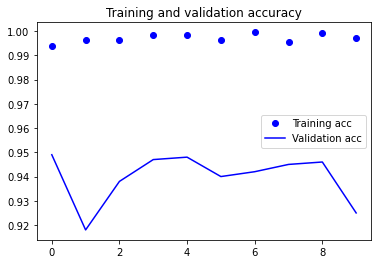

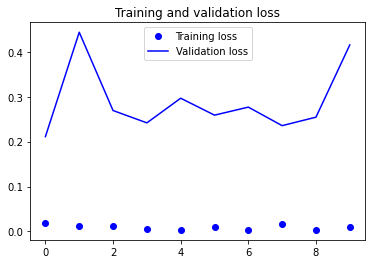

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()